In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in the data from microsoft excel
df = pd.read_excel("alcohol_sales_excel_data.xlsx")

In [3]:
# Column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8824 entries, 0 to 8823
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   product              8824 non-null   object        
 1   style                8824 non-null   object        
 2   size_cl              8824 non-null   float64       
 3   alcohol_percentage   8824 non-null   float64       
 4   average_rating       2659 non-null   float64       
 5   total_reviews        2659 non-null   float64       
 6   in_stock             8824 non-null   object        
 7   price_usd            8824 non-null   float64       
 8   per_litre_usd        8624 non-null   float64       
 9   customer_item_limit  387 non-null    float64       
 10  description          8556 non-null   object        
 11  date_scraped         8824 non-null   datetime64[ns]
 12  country              8678 non-null   object        
 13  organic              8824 non-nul

In [4]:
# Summary stats
df.describe()

,size_cl,alcohol_percentage,average_rating,total_reviews,price_usd,per_litre_usd,customer_item_limit
count,8824.000000,8824.000000,2659.000000,2659.000000,8824.000000,8624.000000,387.000000
mean,71.494753,36.801964,4.615833,10.717563,679.550624,932.741724,1.782946
std,34.946145,13.845829,0.631152,26.577731,2893.099682,3753.936448,1.678705
min,3.000000,0.000000,1.000000,1.000000,1.769000,0.707600,1.000000
25%,70.000000,25.000000,4.500000,1.000000,36.295000,53.558000,1.000000
50%,70.000000,40.000000,5.000000,3.000000,59.719000,87.059200,1.000000
75%,75.000000,45.000000,5.000000,7.500000,183.000000,261.433800,2.000000
max,900.000000,95.000000,5.000000,434.000000,81740.000000,113285.710800,12.000000


### Product size and alcohol percentage

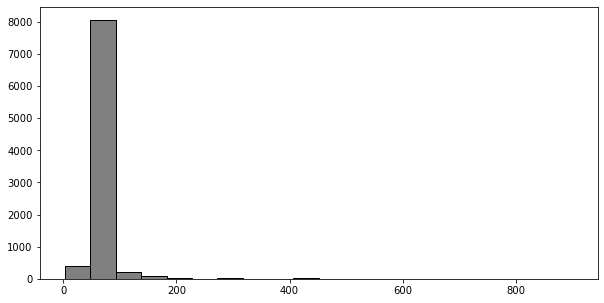

In [5]:
# Histogram for size_cl column
plt.figure(figsize=(10,5))
plt.hist(df["size_cl"], bins = 20, color = "grey", edgecolor = "black")
plt.show()

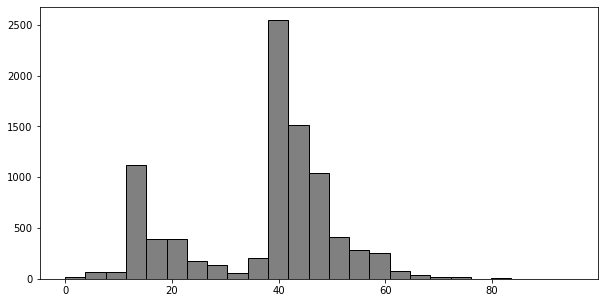

In [6]:
# Histogram for alcohol_percentage column
plt.figure(figsize=(10,5))
plt.hist(df["alcohol_percentage"], bins = 25, color = "grey", edgecolor = "black")
plt.show()

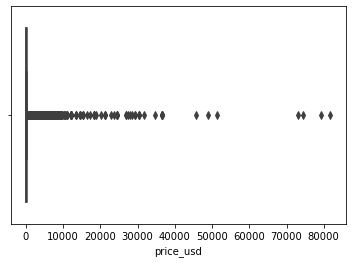

In [7]:
# Price range
sns.boxplot(data = df, x = "price_usd")
plt.show()

In [8]:
df[df["country"].isnull()]

,product,style,size_cl,alcohol_percentage,average_rating,total_reviews,in_stock,price_usd,per_litre_usd,customer_item_limit,description,date_scraped,country,organic,liquor,liqueur,beer,sake,wine
0,12 Best Selling Wines Case,Various,900.0,13.2,NaN,NaN,In Stock,164.700,18.3000,NaN,"A case of 12 of our best-selling wines, from C...",2022-07-07,NaN,False,False,False,False,False,True
137,AE Dor VSOP Fine Champagne Cognac,Cognac,70.0,40.0,4.5,3.0,In Stock,65.209,93.1592,NaN,"A Fine Champagne Cognac from AE Dor, a blend o...",2022-06-22,NaN,False,True,False,False,False,False
142,Aelred Nectarine Aperitif,Aperitif,70.0,12.0,NaN,NaN,In Stock,21.289,30.4146,NaN,"A fruity aperitif from Aelred, made with fresh...",2022-07-02,NaN,False,True,False,False,False,False
203,Alternative Dinner Table Wine Case-6 Bottles,Various,412.0,12.6,NaN,NaN,In Stock,121.939,29.5606,NaN,A superb selection of alternative wines to ado...,2022-07-07,NaN,False,False,False,False,False,True
277,Angostura 7 Year Old Rum,Single Modernist Rum,70.0,40.0,4.5,2.0,In Stock,35.929,51.3254,NaN,"A voluptuous blend of molasses-based, continuo...",2022-06-28,NaN,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8445,Vegan Wines Case-6 Bottles,Various,450.0,13.5,NaN,NaN,In Stock,115.839,25.7420,NaN,A selection of vegan wines that are perfect fo...,2022-07-07,NaN,False,False,False,False,False,True
8450,Veneragua Multi Distillery 2005-13 Year Old Co...,Blended Modernist Rum\nCompagnie des Indes,70.0,45.0,NaN,NaN,In Stock,82.899,118.4254,NaN,A very special multi-national blended rum from...,2022-06-28,NaN,False,True,False,False,False,False
8597,Wemyss Blooming Gorse-Family Collection,Blended Malt Scotch Whisky-Wemyss,70.0,46.0,NaN,NaN,In Stock,54.839,78.3362,NaN,A blended malt whisky from Scottish indie bott...,2022-06-23,NaN,False,True,False,False,False,False
8724,World Beer Bundle,Beer,149.0,4.9,NaN,NaN,In Stock,10.675,7.1614,NaN,Explore different styles of beer from around t...,2022-07-06,NaN,False,False,False,True,False,False


In [9]:
# Some countries are missing
# Fill in with "not_available"
df["country"] = df["country"].fillna("not_available")

In [10]:
df["country"]

0       not_available
1               Italy
2               Italy
3       United States
4              Mexico
            ...      
8819      Netherlands
8820      Netherlands
8821      Netherlands
8822      Netherlands
8823      Netherlands
Name: country, Length: 8824, dtype: object

In [11]:
# Total number of unique values in style column
df["style"].nunique()

611

In [12]:
df["style"].value_counts().sort_values(ascending=False).head(30)

Liqueur                                                    748
Gin                                                        673
Cognac                                                     554
Speyside Single Malt Scotch Whisky\nDistillery Bottling    479
Champagne                                                  463
Highland Single Malt Scotch Whisky\nDistillery Bottling    297
Vodka                                                      290
Vermouth                                                   275
Blended Scotch Whisky                                      268
Red                                                        229
Rum                                                        177
Tequila                                                    160
Islay Single Malt Scotch Whisky\nDistillery Bottling       155
Speyside Single Malt Scotch Whisky\nGordon & MacPhail      152
Armagnac                                                   142
Port                                                   

In [13]:
df[df["style"] == "Amontillado"]

,product,style,size_cl,alcohol_percentage,average_rating,total_reviews,in_stock,price_usd,per_litre_usd,customer_item_limit,description,date_scraped,country,organic,liquor,liqueur,beer,sake,wine
616,Barbadillo Medium Amontillado,Amontillado,75.0,19.5,NaN,NaN,In Stock,13.969,18.6294,NaN,"A tangy, off-dry sherry made by family-run com...",2022-07-07,Spain,False,False,False,False,False,True
621,Barbadillo Principe Amontillado 12 Year Old-Ha...,Amontillado,37.5,17.5,NaN,NaN,In Stock,21.899,58.4014,NaN,Drincipe de Barbadillo is an Amontillado sherr...,2022-07-07,Spain,False,False,False,False,False,True


In [14]:
df["style"] = df["style"].replace(["Amontillado"], "Sherry")
df["style"] = df["style"].replace(["Blended Whiskey"], "Blended Whisky")
df["style"] = df["style"].replace(["Eau-de-vie De Vin"], "Eau-De-Vie")
df["style"] = df["style"].replace(["Eau-de-vie"], "Eau-De-Vie")

df["style"] = df["style"].replace(["Irish Whiskey"], "Irish Whisky")
df["style"] = df["style"].replace(["Madeir"], "Madeira")
df["style"] = df["style"].replace(["Malt Irish Whiskey"], "Malt Irish Whisky")
df["style"] = df["style"].replace(["Pinot Noirr"], "Pinot Noir")
df["style"] = df["style"].replace(["Rose"], "Rosé")
df["style"] = df["style"].replace(["Whiksy"], "Whisky")
df["style"] = df["style"].str.replace("\n", "-").str.strip()
df["country"] = df["country"].replace(["Nassau"], "Bahamas")

In [15]:
df["style"]

0                                             Various
1                                            Vermouth
2                                            Vermouth
3       Small Batch Kentucky Straight Bourbon Whiskey
4                                             Tequila
                            ...                      
8819     Dutch Single Malt Whisky-Distillery Bottling
8820     Dutch Single Malt Whisky-Distillery Bottling
8821                                Zuidam Distillers
8822                              Distillery Bottling
8823                                          Liqueur
Name: style, Length: 8824, dtype: object

In [16]:
df["average_rating"].describe()

count    2659.000000
mean        4.615833
std         0.631152
min         1.000000
25%         4.500000
50%         5.000000
75%         5.000000
max         5.000000
Name: average_rating, dtype: float64

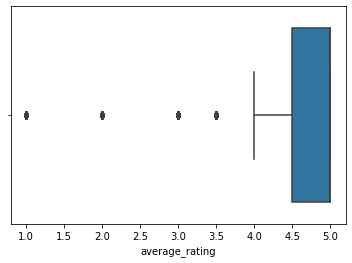

In [17]:
# Price range
sns.boxplot(data = df, x = "average_rating")
plt.show()

In [18]:
df["country"].unique()

array(['not_available', 'Italy', 'United States', 'Mexico', 'Scotland',
       'France', 'New Zealand', 'South Africa', 'Austria', 'England',
       'Canada', 'Chile', 'Denmark', 'Brazil', 'Wales', 'Sweden',
       'Netherlands', 'Portugal', 'St. Lucia', 'Caribbean Blend',
       'Finland', 'Poland', 'Japan', 'Spain', 'Guyana', 'Argentina',
       'Guatemala', 'Germany', 'India', 'Ireland', 'Trinidad & Tobago',
       'Australia', 'Jamaica', 'Cuba', 'Panama', 'Greece',
       'Dominican Republic', 'Czech Republic', 'Puerto Rico', 'Bahamas',
       'Bulgaria', 'Brazil & Barbados', 'Barbados', 'Haiti', 'Norway',
       'Peru', 'Mauritius', 'Switzerland', 'Uruguay', 'Saint Lucia',
       'Slovenia', 'Indonesia', 'Venezuela', 'Oceanian Blend',
       'Sri Lanka', 'Thailand', 'Martinique', 'Belgium', 'Colombia',
       'Belize', 'Romania', 'Virgin Islands', 'Guadeloupe', 'Turkey',
       'Philippines', 'Latvia', 'Antigua', 'Paraguay', 'El Salvador',
       'Fiji', 'Moldova', 'Nicaragua', 'F

In [20]:
df["style"] = df["style"].replace(["Eau-de-vie"], "Eau-De-Vie")

In [21]:
sorted(df["style"].unique().tolist())

['Absinthe',
 'Agave',
 'American Bourbon Whiskey',
 'American Grain Spirit',
 'American Rye Spirit',
 'American Rye Spirit Drink',
 'American Rye Whiskey',
 'American Rye Whisky',
 'American Rye Whisky-That Boutique-y Whisky Company',
 'American Single Barrel Bourbon Whiskey',
 'American Single Barrel Millet Whiskey',
 'American Single Barrel Rye Whiskey',
 'American Single Barrel Whiskey',
 'American Single Corn Whiskey-Simply Whisky',
 'American Single Malt Whiskey',
 'American Single Malt Whiskey-Distillery Bottling',
 'American Single Malt Whisky',
 'American Straight Bourbon Whiskey',
 'American Straight Rye Whiskey',
 'American Whiskey',
 'Aperitif',
 'Aquavit',
 'Armagnac',
 'Arrack',
 'Arthur H Godfree & Co Ltd.',
 'Australian Single Malt Whisky',
 'Australian Single Malt Whisky-Berry Bros & Rudd',
 'Australian Single Malt Whisky-Distillery Bottling',
 'Australian Straight Rye Whiskey',
 'Averys Bristol',
 'Baiju',
 'Beer',
 'Berry Bros & Rudd',
 'Birds',
 'Blendad Malt Scoth 

In [22]:
df.to_csv("alcohol_products_data_cleaned.csv", index=False)